In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#Getting data from URL
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print(data.head(5))
print(data.describe())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


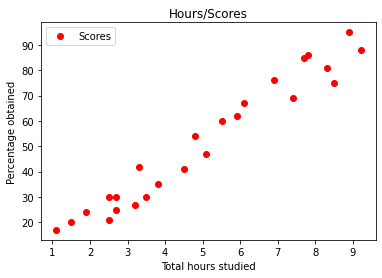

In [3]:
#visualising data in a graphical form using matplotlib to find relationship between Hours studied and Percentage obtained
data.plot(x='Hours' , y='Scores',style='ro')
plt.title("Hours/Scores")
plt.xlabel("Total hours studied")
plt.ylabel("Percentage obtained")
plt.show()

In [4]:
#splitting the Data into Inputs and Outputs
hours=data.iloc[:,:-1]
score=data.iloc[:,1]
print(hours.head(5))
print(score.head(5))

   Hours
0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64


In [5]:
#splitting data into training and testing samples
from sklearn.model_selection import train_test_split
H_train,H_test,S_train,S_test = train_test_split(hours,score,test_size=0.1)

#Training algorithm'
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(H_train,S_train)

LinearRegression()

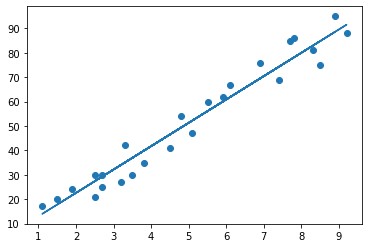

In [6]:
#plotting the regression line in graph
plt.scatter(hours,score)
plt.plot(hours, LR.coef_*hours + LR.intercept_);
plt.show()

In [7]:
print(H_test) # Testing data - In Hours
s_pred = LR.predict(H_test) # Predicting the scores

    Hours
15    8.9
17    1.9
2     3.2


In [8]:
# Comparing Real valus against Predicted values
comp = pd.DataFrame({'Real': S_test, 'Predicted': s_pred})  
print(comp) 

    Real  Predicted
15    95  88.659564
17    24  21.599531
2     27  34.053537


In [9]:
#predicting score for the student who studied for 9.25 hours as specified in the task
predicted = LR.predict([[9.25]])
print("No of Hours = {}".format(9.25))
print("Predicted Score = {}".format(predicted[0]))

No of Hours = 9.25
Predicted Score = 92.01256528306006


In [10]:
#Testing accuracy of the model
import sklearn.metrics as sm
print("R2 score =", sm.r2_score(S_test, s_pred))
print('Mean Absolute Error:', sm.mean_absolute_error(S_test, s_pred))

R2 score = 0.9703176245889312
Mean Absolute Error: 5.264814174537033


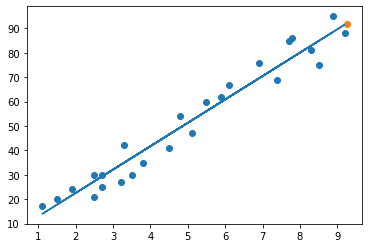

In [11]:
#plotting the predicted value on a graph as to visualise how the predictation process works
plt.scatter(hours,score)
plt.plot(hours, LR.coef_*hours + LR.intercept_);
plt.scatter(9.25,92.01)
plt.show()